# Analyzing moving growth ratio

In [932]:
import pandas as pd
from importlib import reload
import numpy as np

import common
reload(common)
import moving
reload(moving)

<module 'moving' from '/Users/fedor/PROJECTS/Stock/tools/notebook/moving.py'>

## Loading stocks prices history from './history' folder

In [933]:
history = common.load_history('./history')

513 files with prices hoistory found
513 files with prices hoistory loaded
99099 items totaly since 2000-02-29 00:00:00 to 2018-07-09 00:00:00


## Compute moving growing ratio for periods 30, 90, 180, 270 and 360 days

In [934]:
def growing_ratios(h, windows = [30, 90, 180, 270, 360]):
    growth = []
    growth_window = []
    for window in windows:
        growth +=  moving.moving_f(moving.growth_ratio, h, window_size = window)
        growth_window += list([int(window)]*len(h))
    gr_h = pd.concat([h[['datenum']]]*len(windows))
    gr_h['growth'] = growth
    gr_h['growth-window'] = growth_window    
    return gr_h
    

In [935]:
gr_history = {}
symbols = [*history.keys()]
for i in range(len(symbols)):
    symbol = symbols[i]
    h = history[symbol]
    gr_history[symbol] = growing_ratios(h)
    print("[{}/{}] {} - OK".format(i+1, len(history), symbol))

[1/513] A - OK
[2/513] AA - OK
[3/513] AABA - OK
[4/513] AAL - OK
[5/513] AAP - OK
[6/513] ABBV - OK
[7/513] ABT - OK
[8/513] ACH - OK
[9/513] ACN - OK
[10/513] ADBE - OK
[11/513] ADI - OK
[12/513] ADM - OK
[13/513] ADP - OK
[14/513] ADS - OK
[15/513] ADSK - OK
[16/513] AEE - OK
[17/513] AES - OK
[18/513] AET - OK
[19/513] AFL - OK
[20/513] AGN - OK
[21/513] AHT - OK
[22/513] AIG - OK
[23/513] AIV - OK
[24/513] AIZ - OK
[25/513] AJG - OK
[26/513] AKAM - OK
[27/513] ALB - OK
[28/513] ALGN - OK
[29/513] ALK - OK
[30/513] ALL - OK
[31/513] ALLE - OK
[32/513] ALXN - OK
[33/513] AMAT - OK
[34/513] AME - OK
[35/513] AMG - OK
[36/513] AMGN - OK
[37/513] AMP - OK
[38/513] AMT - OK
[39/513] AMZN - OK
[40/513] AN - OK
[41/513] ANDV - OK
[42/513] ANSS - OK
[43/513] ANTM - OK
[44/513] AON - OK
[45/513] AP3.SG - OK
[46/513] APA - OK
[47/513] APH - OK
[48/513] APLE - OK
[49/513] APTV - OK
[50/513] ARE - OK
[51/513] ARNC - OK
[52/513] ATVI - OK
[53/513] AVB - OK
[54/513] AVP - OK
[55/513] AVY - OK
[5

## Add column with price ratio

In [936]:
for (symbol, h) in history.items():
    h['close-ratio'] = h['close'] / h['open'].iloc[0]

## Draw few moving grow ratio graphs

In [937]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.dates as dates


In [956]:
def draw_growth_ratio(history, gr_history, symbol, title):
    h, gr_h = history[symbol], gr_history[symbol]
    
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 6)

    p = sns.pointplot(x='datenum', y='close-ratio', data=h, ax=ax, color='grey', scale=0.5, markers='', linestyles='--')
    p.axes.axhline(1, color='black', linewidth=0.5)
    index_size = h.index.unique().size
    x_locs = np.arange(index_size - 1, -1, -12)[::-1]
    plt.xticks(x_locs, h.index.take(x_locs).map(lambda x: x.strftime('%Y-%m-%d')), rotation=90)

    ax2 = ax.twinx()
    p = sns.pointplot(x='datenum', y='growth', data=gr_h, hue='growth-window', ax=ax2, scale=0.2)
    p.set_title('{} ({})'.format(title, symbol))
    p.axes.axhline(1, color='black', linewidth=0.5)
    index_size = gr_h.index.unique().size
    x_locs = np.arange(index_size - 1, -1, -12)[::-1]
    plt.xticks(x_locs, gr_h.index.take(x_locs).map(lambda x: x.strftime('%Y-%m-%d')), rotation=90)
    
    plt.show()


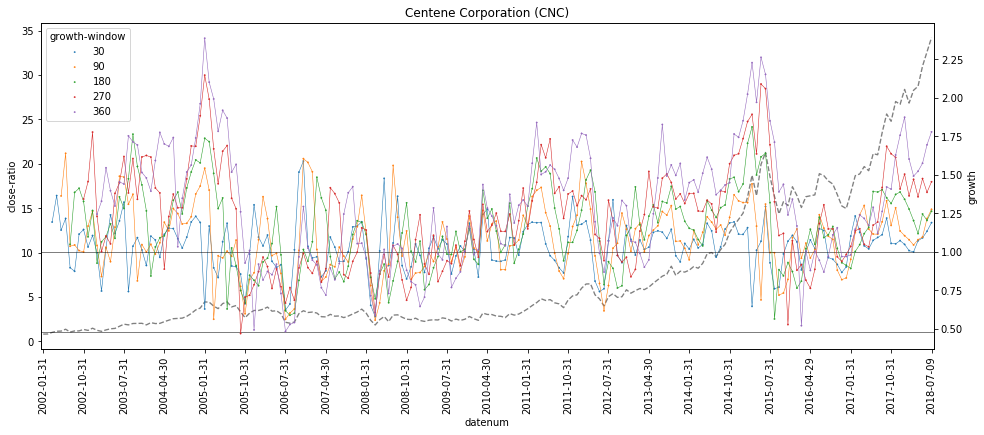

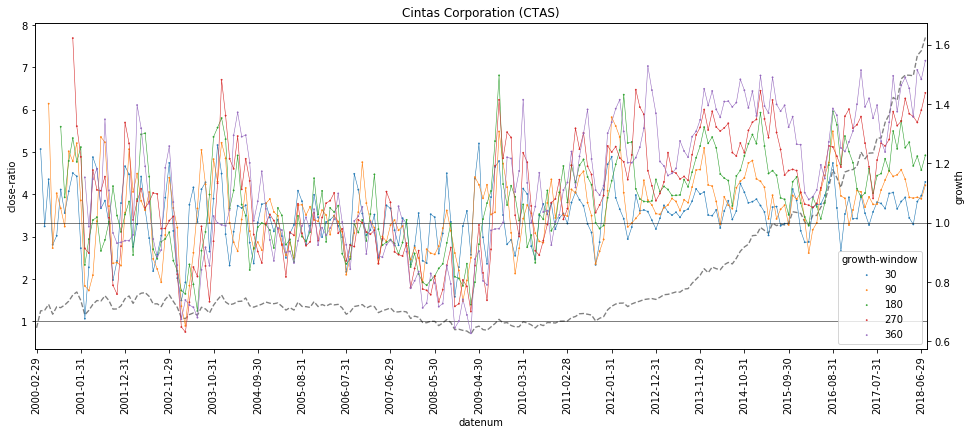

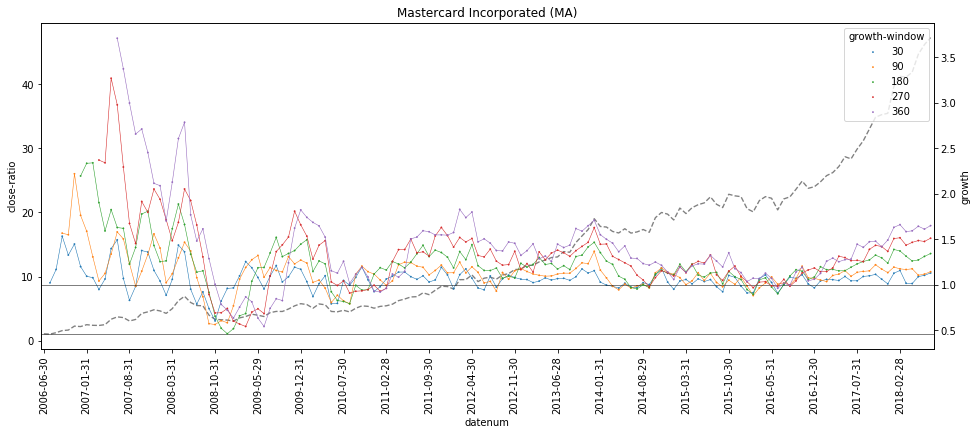

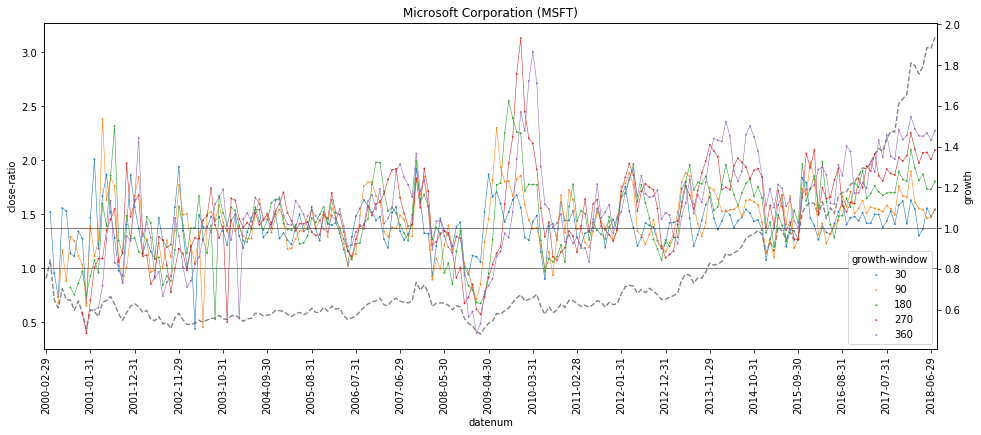

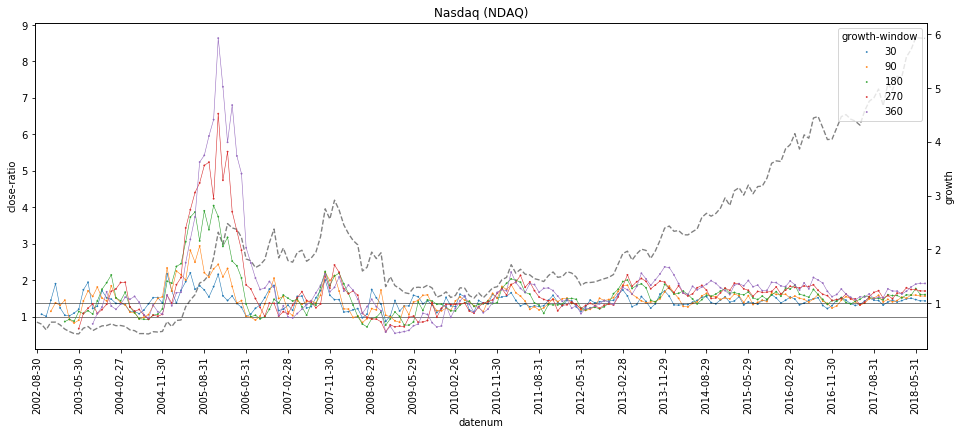

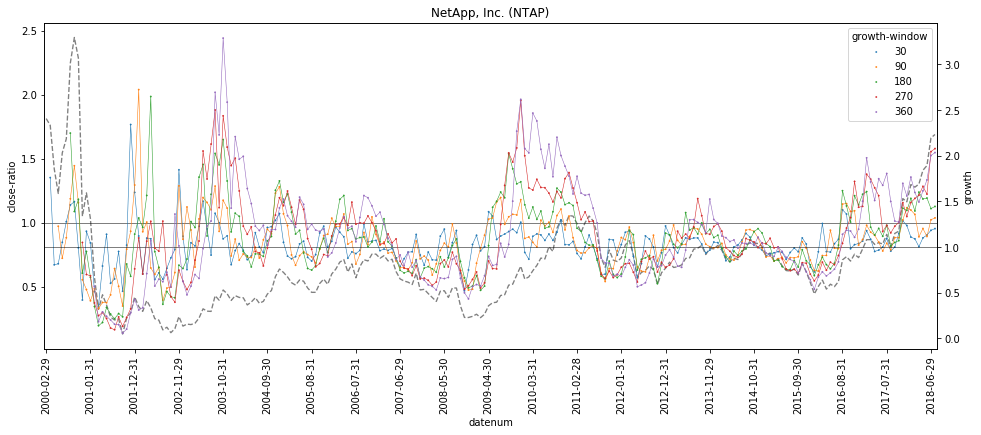

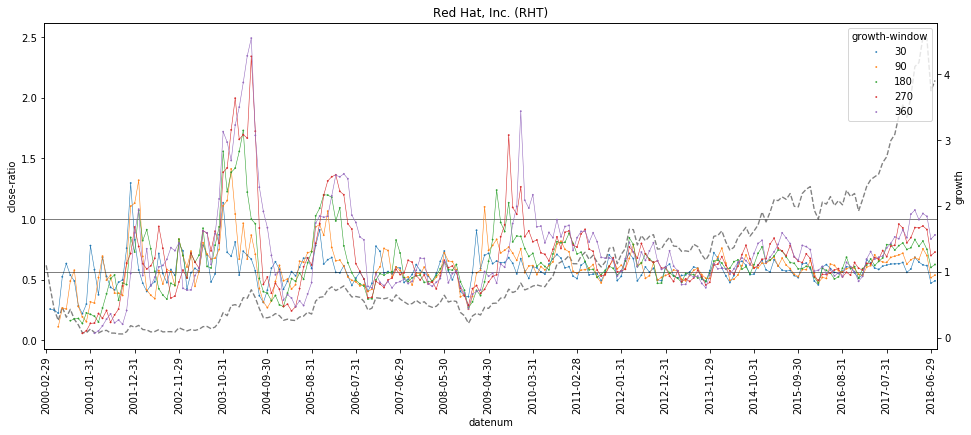

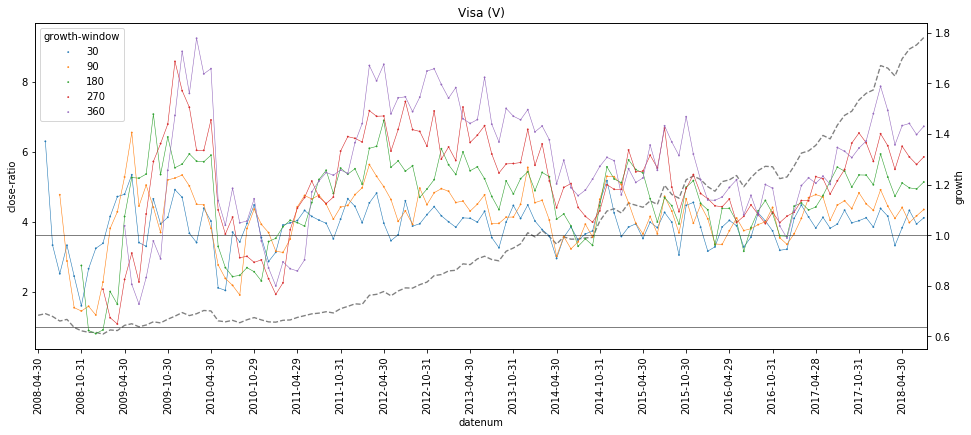

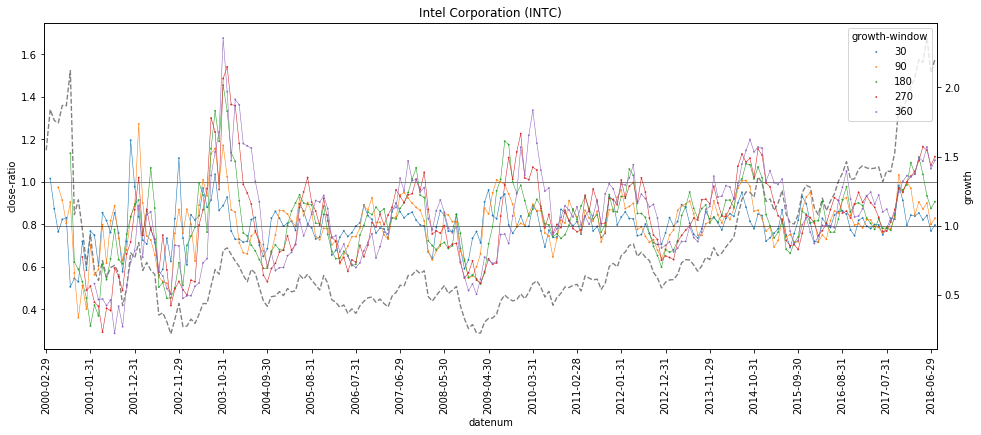

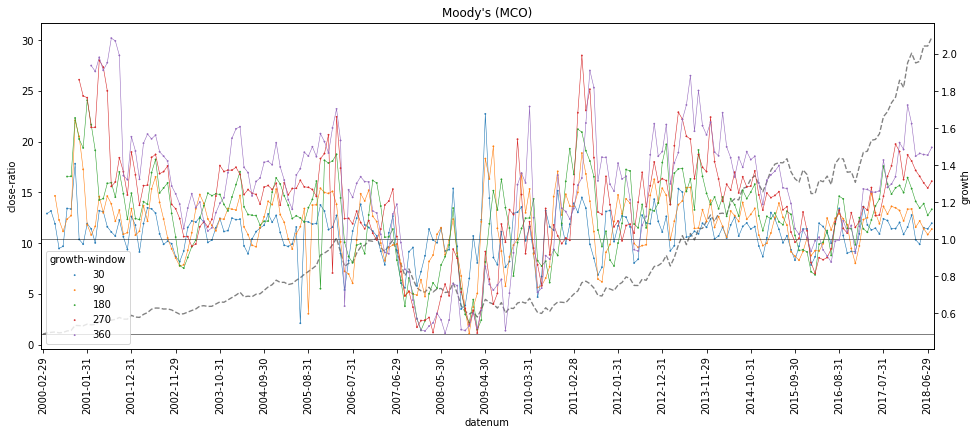

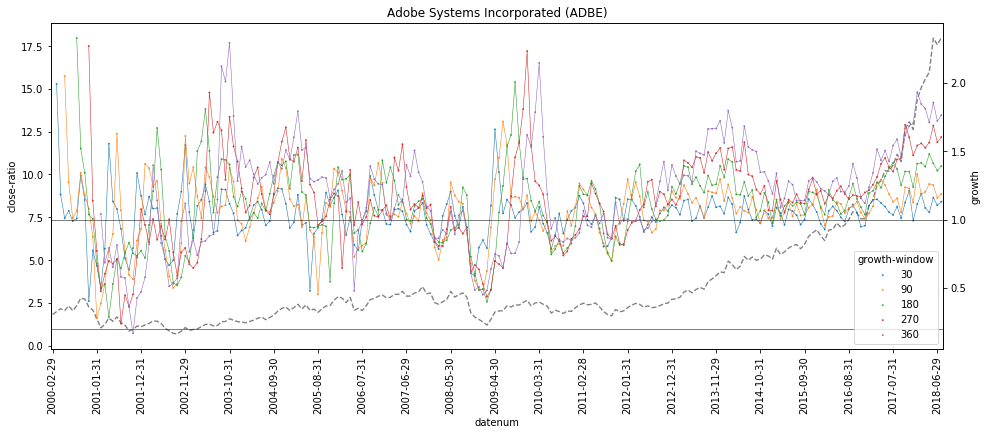

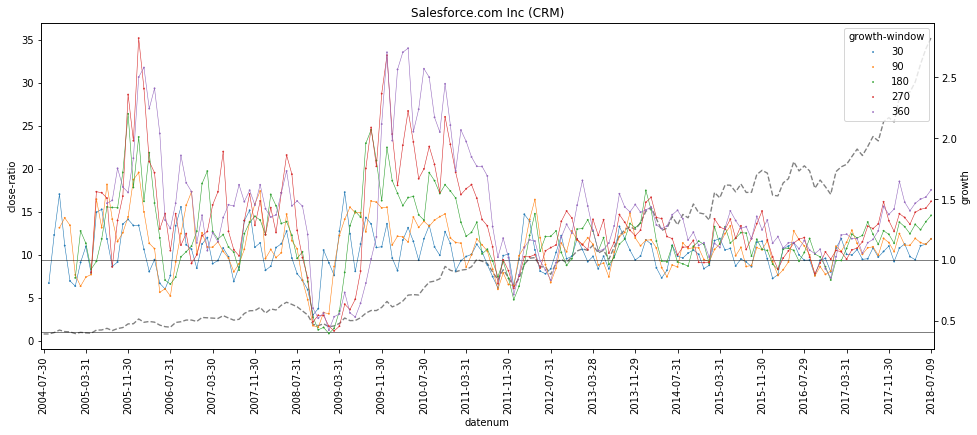

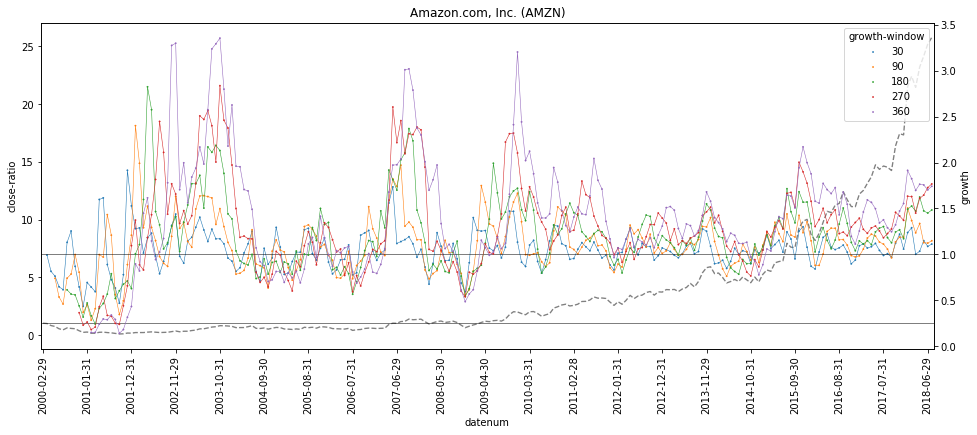

In [939]:
stocks = pd.read_csv('data/stocks.tcs', index_col=0)
for symbol in ['CNC', 'CTAS', 'MA', 'MSFT', 'NDAQ', 'NTAP', 'RHT', 'V', 'INTC', 'MCO', 'ADBE', 'CRM', 'AMZN']:
    draw_growth_ratio(history, gr_history, symbol, stocks['Name'][symbol])

In [940]:
close_ratio_top = sorted([(h['close-ratio'].max(), symbol, h['close-ratio'].iloc[-1]) for (symbol, h) in history.items()], reverse = True)
close_ratio_top

[(738.3771721289448, 'MNST', 635.4610515522738),
 (387.929639371899, 'NFLX', 387.929639371899),
 (216.1457405448397, 'PGR', 207.37319639645835),
 (94.27692307692307, 'KMX', 94.27692307692307),
 (93.38120965067971, 'TSCO', 77.81842701387862),
 (88.00883543239414, 'NVDA', 86.9828392542299),
 (81.6167418039012, 'GILD', 57.19713325973261),
 (76.85979645181024, 'ISRG', 76.85979645181024),
 (68.26589595375722, 'ANSS', 68.26589595375722),
 (67.67816091954023, 'VIPS', 25.264367816091955),
 (67.57054452966976, 'SWN', 7.8505196963931665),
 (65.12430458274028, 'ROST', 65.12430458274028),
 (64.25432466509125, 'ATVI', 64.25432466509125),
 (59.69310793237971, 'IDXX', 59.69310793237971),
 (53.713553500858616, 'BF-B', 48.47509992276138),
 (52.91368421052632, 'DVA', 44.6021052631579),
 (52.33489063192033, 'RRC', 10.023859528810023),
 (50.04074662128022, 'CTSH', 49.53669333273767),
 (49.29150587273166, 'CELG', 28.34379898113119),
 (48.03474113508524, 'JBHT', 46.67731909832484),
 (47.26095282225309, 'MA'

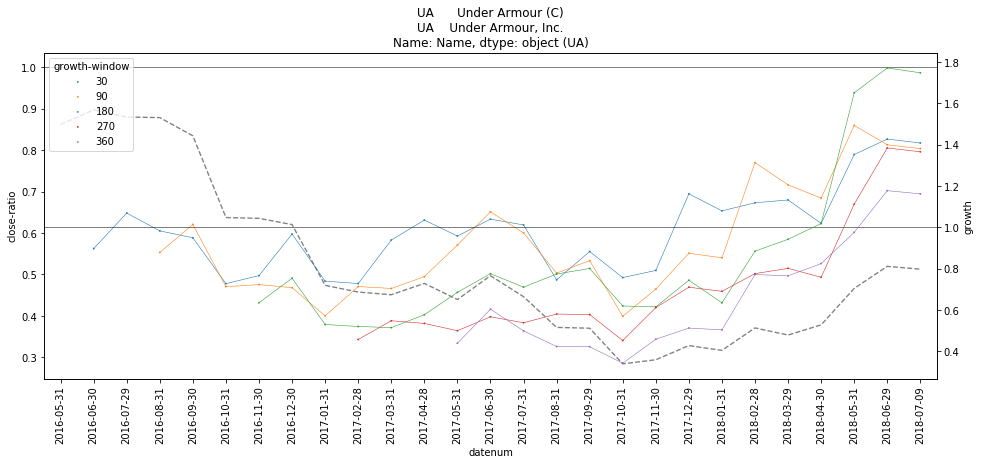

In [957]:
symbol = 'UA'
draw_growth_ratio(history, gr_history, symbol, stocks['Name'][symbol])

In [906]:
history['NFLX'].loc['2015':'2015-12']

,open,close,volume,high,low,datenum,close-ratio
date,,,,,,,
2015-01-30,344.06,441.80,60846647,457.380,316.85,735628.0,29.219577
2015-02-27,439.90,474.91,29957829,486.499,433.69,735656.0,31.409392
2015-03-31,474.00,416.69,46838521,480.250,410.01,735688.0,27.558862
2015-04-30,417.50,556.50,72638621,576.130,409.25,735718.0,36.805556
2015-05-29,558.99,624.06,40004097,631.440,552.26,735747.0,41.273810
2015-06-30,621.86,656.94,67037351,706.240,615.61,735779.0,43.448413
2015-07-31,663.64,114.31,266271497,716.160,97.05,735810.0,7.560185
2015-08-31,114.60,115.03,469605799,129.290,85.50,735841.0,7.607804
2015-09-30,109.36,103.26,496545738,111.240,93.55,735871.0,6.829365


In [942]:
history['NFLX'].loc['2015':'2015-12']

,open,close,volume,high,low,datenum,close-ratio
date,,,,,,,
2015-01-30,49.151362,63.1142,60846647,65.339911,45.264224,735628.0,58.438239
2015-02-27,62.842778,67.8442,29957829,69.499769,61.955636,735656.0,62.817806
2015-03-31,67.714237,59.5271,46838521,68.607093,58.572815,735688.0,55.116897
2015-04-30,59.642782,79.4999,72638621,82.304182,58.464212,735718.0,73.609966
2015-05-29,79.855599,89.1513,40004097,90.205584,78.894172,735747.0,82.546320
2015-06-30,88.837075,93.8485,67037351,100.891352,87.944219,735779.0,86.895517
2015-07-31,114.310000,114.3100,266271497,114.310000,97.050000,735810.0,105.841079
2015-08-31,114.600000,115.0300,469605799,129.290000,85.500000,735841.0,106.507737
2015-09-30,109.360000,103.2600,496545738,111.240000,93.550000,735871.0,95.609744
